# PHASE 4 PROJECT
- Oscar Mulei
- Rose Kyalo
- Angel Linah Atungire 

## DATA CLEANING AND EXPLORATORY DATA ANALYSIS

In [35]:
# import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset
links = pd.read_csv("Data/links.csv")
tags = pd.read_csv("Data/tags.csv")
ratings = pd.read_csv("Data/ratings.csv")
movies = pd.read_csv("Data/movies.csv")

In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [17]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [18]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [11]:
# checking for missing values
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [12]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [14]:
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [21]:
# handling the missing values in links data
# decided to delete the rows with the missing data, since it is only 0.082% of the data.
links.dropna(inplace=True)

In [22]:
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [23]:
# checking for duplicates
movies.duplicated().sum()

0

In [24]:
links.duplicated().sum()

0

In [25]:
ratings.duplicated().sum()

0

In [26]:
tags.duplicated().sum()

0

In [ ]:
# Exploratory data analysis 
# Visualizing the data to see if there are any relationships or hidden trends.

In [27]:
tags['tag'].value_counts()

In Netflix queue        131
atmospheric              36
thought-provoking        24
superhero                24
funny                    23
                       ... 
Suspense                  1
GIVE ME BACK MY SON!      1
truth                     1
Jekyll and Hyde           1
dust bowl                 1
Name: tag, Length: 1589, dtype: int64

In [28]:
movies['title'].value_counts()

Eros (2004)                               2
War of the Worlds (2005)                  2
Emma (1996)                               2
Confessions of a Dangerous Mind (2002)    2
Saturn 3 (1980)                           2
                                         ..
Deep Rising (1998)                        1
Gunman, The (2015)                        1
Sabotage (1936)                           1
Lake Placid (1999)                        1
Karate Kid, Part II, The (1986)           1
Name: title, Length: 9737, dtype: int64

In [29]:
movies['genres'].value_counts()

Drama                                          1053
Comedy                                          946
Comedy|Drama                                    435
Comedy|Romance                                  363
Drama|Romance                                   349
                                               ... 
Action|Crime|Sci-Fi|IMAX                          1
Comedy|Fantasy|Mystery                            1
Crime|Drama|Romance|War                           1
Adventure|Animation|Children|Romance|Sci-Fi       1
Adventure|Comedy|Sci-Fi|Thriller                  1
Name: genres, Length: 951, dtype: int64

In [30]:
movies_and_ratings = pd.merge(movies, ratings, on ='movieId')

In [31]:
movies_and_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


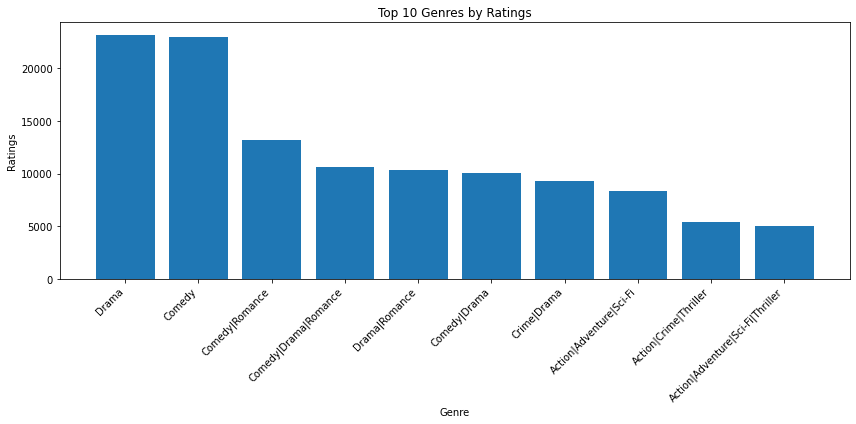

In [38]:
# Create a dictionary that will contain the genres appearing once and the total rating
genres_dict = {}
for _, row in movies_and_ratings.iterrows():
    genres = row['genres']
    rating = row['rating']
    if genres in genres_dict:
        genres_dict[genres] += rating
    else:
        genres_dict[genres] = rating
        
#sort the dictionary in descending order of ratings
sorted_genres = sorted(genres_dict.items(), key=lambda x:x[1], reverse=True)
# the output is a list of tuples

# Extract the Top 10 Genres and plot them
top_10_genres = sorted_genres[:10]
genres, rating = zip(*top_10_genres)
#using the zip function with * to unpack the tuples in the sorted list
# allows us to separate the genres and ratings into separate lists

#create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genres, rating)
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.title('Top 10 Genres by Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

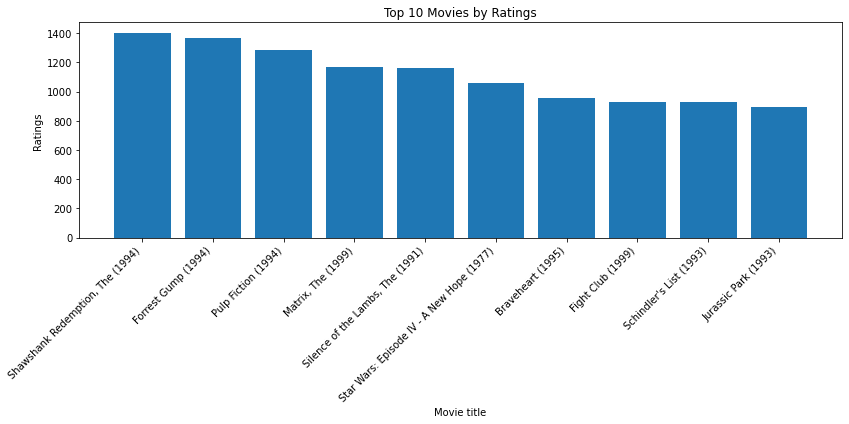

In [42]:
# Create a dictionary that will contain the movie title appearing once and the total rating
movies_dict = {}
for _, row in movies_and_ratings.iterrows():
    movies = row['title']
    rating = row['rating']
    if movies in movies_dict:
        movies_dict[movies] += rating
    else:
        movies_dict[movies] = rating
        
#sort the dictionary in descending order of ratings
sorted_movies = sorted(movies_dict.items(), key=lambda x:x[1], reverse=True)
# the output is a list of tuples

# Extract the Top 10 movies and plot them
top_10_movies = sorted_movies[:10]
movies, rating = zip(*top_10_movies)
#using the zip function with * to unpack the tuples in the sorted list
# allows us to separate the movies and ratings into separate lists

#create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(movies, rating)
plt.xlabel('Movie title')
plt.ylabel('Ratings')
plt.title('Top 10 Movies by Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()